In [1]:
import numpy as np 
from scipy.integrate import odeint 
import matplotlib.pyplot as plt 


In [10]:
# Step 2: Define the differential equation
def dX_dt(X, t, R, L, C, E_function):
    x1, x2 = X
    dx1dt = x2
    dx2dt = -(R/L)*x2 - (1/(L*C))*x1 + E_function(t)/L
    return [dx1dt, dx2dt]

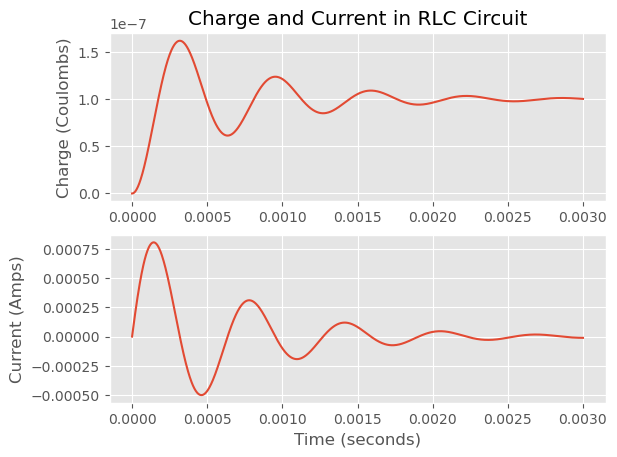

In [25]:
# Parameters
R = 300.0  # Resistance in ohms
L = 100 * 10**-3 # 0.1  # Inductance in henrys
C = 100 * 10**-9 # 0.001  # Capacitance in farads

# External voltage as a function of time
def E(t):
    return 1; # return np.sin(2 * np.pi * t)  # Example: Sinusoidal input

# Initial conditions: q(0) = 0 (initial charge), dq/dt(0) = 0 (initial current)
X0 = [0, 0]

# Time points to solve for
t = np.linspace(0, 0.003, 1000)  # From 0 to 10 seconds, 1000 points

# Step 3: Solve the differential equation
solution = odeint(dX_dt, X0, t, args=(R, L, C, E))

# Step 4: Plot the results
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(t, solution[:, 0])
plt.title('Charge and Current in RLC Circuit')
plt.ylabel('Charge (Coulombs)')

plt.subplot(2, 1, 2)
plt.plot(t, solution[:, 1])
plt.xlabel('Time (seconds)')
plt.ylabel('Current (Amps)')
plt.savefig("Example_RLC_cicuit.png")
plt.show()

Inductance (H): 	0.0229
Resistance (Ohm): 	3.34
DC voltage (V): 	5
Current (A): 		1.4970059880239521
Tau: 			0.006856287425149701
Critical time (s): 	0.03016766467065869


Switch frequency (Hz): 	16.57403731639539
w coefficient (2*pi*f) 	104.1377477470217


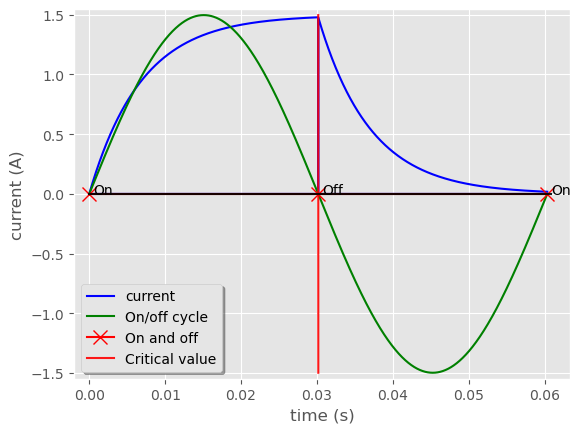

In [9]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

l = 0.0229      #Inductance (H)
r = 3.34        #Resistance (Ohm)
v = 5           #Voltage (V) DC
i = v/r         #Peak current (A)
tau = l/r       #Tau time constant
a = tau * 4.4   #critical time value at which current is switched (switching occurs every a seconds)

t = np.linspace(0,2*a,2000) #Time vector
#-------------------------------------------------------------------------------
#1st on-cycle current

def initialCurrent():
    current = []
    for i in t:
        if i <= a:
            current.append((v/r)*(1-np.exp((-r/l)*i)))          #I(t) = v/r*[1-exp((-r/l)*t)]
        else:
            current.append(0)
    return np.array(current)

#Plot Icurrent
Icurrent = initialCurrent()
plt.plot(t,Icurrent,label='current',color='blue')

#------------------------------------------------------------------------------
#1st off-cycle current
def laterCurrent():
    current = []
    for i in t:
        if i >= a:
            current.append(Icurrent[-1001]*np.exp((-r/l)*(i-a)))  #I(t) = Ir * exp((-r/l)*(t-t0))
        else:
            current.append(0)
    return np.array(current)

#Plot current after switch off
current_off = laterCurrent()
plt.plot(t,current_off,color='blue')

#-------------------------------------------------------------------------------
#Current on and off cycle: on and off at the zeros of the it function
f = 1/(2*a)                 #frequency f = 1/T
w = np.pi/a                 #w = 2pi * f
it = i*np.sin(w*t)
plt.plot(t,it,label='On/off cycle',color='green')

#Plot zeros (switching points)
zeros = np.array([0,a,2*a])
zeros_i = i*np.sin(w*zeros)
plt.plot(zeros,zeros_i,marker='x',markersize=10,label='On and off',color='red')
plt.annotate('On',xy=(zeros[0]+0.0005,zeros_i[0]))
plt.annotate('Off',xy=(zeros[1]+0.0005,zeros_i[1]))
plt.annotate('On',xy=(zeros[2]+0.0005,zeros_i[2]))

#Critical value plot
plt.plot((a,a+0.00001),(max(it),min(it)),'r',alpha=0.9,label='Critical value')

#-------------------------------------------------------------------------------
#Print some data
print('Inductance (H):','\t'+str(l))
print('Resistance (Ohm):','\t'+str(r))
print('DC voltage (V):','\t'+str(v))
print('Current (A):','\t\t'+str(i))
print('Tau:','\t\t\t'+str(tau))
print('Critical time (s):','\t'+str(a))
print('\n')
print('Switch frequency (Hz):','\t'+str(f))
print('w coefficient (2*pi*f)','\t'+str(w))

#-------------------------------------------------------------------------------
#Plot settings

#x axis line
plt.plot((0,2*a+0.0005),(0,0),'k',alpha=0.9,markersize=10)

#Axis labels
plt.xlabel('time (s)')
plt.ylabel('current (A)')

#Legend and limits
plt.legend(loc=3,fancybox=True,shadow=True)
plt.xlim(-0.002,2*a+0.003)
plt.ylim(min(it)-0.05,max(it)+0.05)
plt.savefig("Example_RL_cicuit.png")
plt.show()
#-------------------------------------------------------------------------------
# Output

# Inductance (H): 	0.0229
# Resistance (Ohm): 	3.34
# DC voltage (V): 	5
# Current (A): 		1.4970059880239521
# Tau: 			0.006856287425149701
# Critical time (s): 	0.03016766467065869
# Switch frequency (Hz): 	16.57403731639539
# w coefficient (2*pi*f) 	104.1377477470217